In [270]:
using Plots
using DSP, WAV

#Import the training filenames

SetUpFiles = readdir("/Users/nathangonzalez/Downloads/AudioWAV")

;

In [271]:
ang = []
dis = []
fea = []
hap = []
neu = []
sad = []

for filename in SetUpFiles
    if occursin("ANG", filename) == true
        push!(ang, filename)
    elseif occursin("DIS", filename) == true
        push!(dis, filename)
    elseif occursin("FEA", filename) == true
        push!(fea, filename)
    elseif occursin("HAP", filename) == true
        push!(hap, filename)
    elseif occursin("NEU", filename) == true
        push!(neu, filename)
    elseif occursin("SAD", filename) == true
        push!(sad, filename)
    else
        continue
    end
end

In [272]:
using Distributions, Random
angerTrain = sort(Random.randsubseq(ang, .1))
angerTest = sort(Random.randsubseq(setdiff(ang, angerTrain), .05))

disgustTrain = sort(Random.randsubseq(dis, .1))
disgustTest = sort(Random.randsubseq(setdiff(dis, disgustTrain), .05))

fearTrain = sort(Random.randsubseq(fea, .1))
fearTest = sort(Random.randsubseq(setdiff(fea, fearTrain), .05))

sadTrain = sort(Random.randsubseq(sad, .1))
sadTest = sort(Random.randsubseq(setdiff(sad, sadTrain), .05))

happyTrain = sort(Random.randsubseq(hap, .1))
happyTest = sort(Random.randsubseq(setdiff(hap, happyTrain), .05))

neutralTrain = sort(Random.randsubseq(neu, .1))
neutralTest = sort(Random.randsubseq(setdiff(neu, neutralTrain), .05))

;

In [273]:
#traindatafiles = vcat(angerTrain, disgustTrain, fearTrain, sadTrain, happyTrain, neutralTrain)
#testdatafiles = vcat(angerTest, disgustTest, fearTest, sadTest, happyTest, neutralTest)

;

In [469]:
traindatafiles = vcat(angerTrain, disgustTrain, fearTrain, sadTrain, happyTrain, neutralTrain)
testdatafiles = vcat(angerTest, disgustTest, fearTest, sadTest, happyTest, neutralTest)

;

335-element Vector{Any}:
 "1001_WSI_ANG_XX.wav"
 "1004_ITH_ANG_XX.wav"
 "1004_IWW_ANG_XX.wav"
 "1005_ITH_ANG_XX.wav"
 "1006_TAI_ANG_XX.wav"
 "1013_TIE_ANG_XX.wav"
 "1020_IWW_ANG_XX.wav"
 "1021_IEO_ANG_HI.wav"
 "1023_TSI_ANG_XX.wav"
 "1024_IEO_ANG_LO.wav"
 "1026_ITS_ANG_XX.wav"
 "1028_TIE_ANG_XX.wav"
 "1029_IEO_ANG_LO.wav"
 ⋮
 "1073_ITH_NEU_XX.wav"
 "1079_IEO_NEU_XX.wav"
 "1080_ITH_NEU_XX.wav"
 "1081_IWL_NEU_XX.wav"
 "1082_IEO_NEU_XX.wav"
 "1084_ITS_NEU_XX.wav"
 "1085_IWL_NEU_XX.wav"
 "1085_TIE_NEU_XX.wav"
 "1087_TIE_NEU_XX.wav"
 "1089_IEO_NEU_XX.wav"
 "1090_IWW_NEU_XX.wav"
 "1091_WSI_NEU_XX.wav"

In [470]:
emotions = []
colors = []

for filename in traindatafiles
    if occursin("ANG", filename) == true
        push!(emotions, "Anger")
        push!(colors, "red")
    elseif occursin("DIS", filename) == true
        push!(emotions, "Disgust")
        push!(colors, "purple")
    elseif occursin("FEA", filename) == true
        push!(emotions, "Fear")
        push!(colors, "orange")
    elseif occursin("HAP", filename) == true
        push!(emotions, "Happy")
        push!(colors, "yellow")
    elseif occursin("SAD", filename) == true
        push!(emotions, "Sad")
        push!(colors, "blue")
    elseif occursin("NEU", filename) == true
        push!(emotions, "Neutral")
        push!(colors, "green")
    else
        continue
    end
end

emotionsTest = []
colorsTest = []

for filename in testdatafiles
    if occursin("ANG", filename) == true
        push!(emotionsTest, "Anger")
        push!(colorsTest, "red")
    elseif occursin("DIS", filename) == true
        push!(emotionsTest, "Disgust")
        push!(colorsTest, "purple")
    elseif occursin("FEA", filename) == true
        push!(emotionsTest, "Fear")
        push!(colorsTest, "orange")
    elseif occursin("HAP", filename) == true
        push!(emotionsTest, "Happy")
        push!(colorsTest, "yellow")
    elseif occursin("SAD", filename) == true
        push!(emotionsTest, "Sad")
        push!(colorsTest, "blue")
    elseif occursin("NEU", filename) == true
        push!(emotionsTest, "Neutral")
        push!(colorsTest, "green")
    else
        continue
    end
end

In [471]:
relativePath = "/Users/nathangonzalez/Downloads/AudioWAV/"

freqs = []
signals = []
for filename in traindatafiles
    ss, Fs = wavread(relativePath*filename, subrange=20000)
    push!(freqs,Fs)
    push!(signals, ss[:,1])
end

freqsTest = []
signalsTest = []
for filename in testdatafiles
    ss, Fs = wavread(relativePath*filename, subrange=20000)
    push!(freqsTest,Fs)
    push!(signalsTest, ss[:,1])
end

In [472]:
powers = []

for ss_ind in 1:length(traindatafiles)
    prdgrm = DSP.Periodograms.periodogram(signals[ss_ind], fs=Int(freqs[ss_ind]), window=DSP.Windows.hamming)
    push!(powers, prdgrm.power)
end

powersTest = []

for ss_ind in 1:length(testdatafiles)
    prdgrm = DSP.Periodograms.periodogram(signalsTest[ss_ind], fs=Int(freqsTest[ss_ind]), window=DSP.Windows.hamming)
    push!(powersTest, prdgrm.power)
end

In [473]:
#Check sizing minimum should be 10001

sizes = []
for i in powers
    size = length(i)
    push!(sizes,size)
end

minimum(sizes)

10001

In [474]:
Train_mat = reduce(hcat,powers)

10001×782 Matrix{Float64}:
 4.14929e-10  1.775e-9     1.56848e-9   …  1.52634e-10  3.81531e-10
 6.18559e-10  1.30265e-9   4.64006e-10     8.14856e-11  4.14332e-10
 1.047e-11    5.54069e-10  3.09655e-10     3.23155e-10  1.89353e-9
 1.29592e-10  3.06595e-10  5.70974e-10     1.39256e-10  2.63364e-9
 2.20975e-10  2.0881e-10   4.05383e-10     2.88277e-10  7.55819e-10
 5.94468e-10  2.65121e-10  1.31235e-10  …  9.61578e-10  6.4079e-9
 7.25957e-11  3.1098e-10   3.09577e-10     8.60849e-10  6.82854e-9
 2.812e-10    1.31216e-10  1.03587e-10     4.85459e-10  2.36681e-9
 4.14616e-10  4.39574e-11  1.89027e-10     1.82561e-10  3.93381e-9
 9.19037e-12  2.95542e-10  2.55896e-10     1.75349e-9   1.30283e-9
 7.14324e-11  3.44687e-10  2.77512e-11  …  1.00314e-9   3.32469e-10
 2.36089e-10  4.93538e-10  1.43554e-10     1.69694e-9   1.23266e-9
 1.10723e-11  3.40433e-11  4.12364e-10     8.7608e-10   8.64632e-10
 ⋮                                      ⋱  ⋮            
 1.0352e-11   5.49384e-8   2.06015e-9    

In [475]:
#Compute covariance matrix

using Distributions
data_cov = cov( Train_mat, dims=2, corrected=true )

10001×10001 Matrix{Float64}:
 2.46029e-15  6.26839e-15  5.65606e-15  …  1.26581e-16   3.67823e-17
 6.26839e-15  1.81159e-14  1.68996e-14     2.50925e-16   6.6395e-17
 5.65606e-15  1.68996e-14  2.11806e-14     1.62017e-16   7.985e-17
 4.8417e-15   1.50424e-14  1.79594e-14     1.66049e-16   9.83711e-17
 3.9332e-15   1.17518e-14  1.42722e-14     1.79798e-16   1.03238e-16
 5.13721e-15  1.51161e-14  1.74914e-14  …  2.07192e-16   8.6787e-17
 4.82087e-15  1.36319e-14  1.45398e-14     1.80821e-16   5.94002e-17
 4.10811e-15  1.10247e-14  8.36394e-15     1.64542e-16   3.69217e-17
 2.86399e-15  6.48703e-15  6.15236e-15     7.69605e-17   3.48941e-17
 4.63919e-15  1.26497e-14  1.20525e-14     1.0607e-16    3.70575e-17
 3.9988e-15   1.11775e-14  1.2025e-14   …  7.19484e-17   1.87953e-17
 2.15755e-15  5.29832e-15  4.83515e-15     4.39862e-17  -7.29376e-18
 2.82868e-15  6.55815e-15  7.14083e-15     1.56009e-16   8.81262e-17
 ⋮                                      ⋱                ⋮
 1.44502e-16  5.291

In [391]:
#Find eigenvalues

eigvals(data_cov)

10001-element Vector{Float64}:
 -5.609199777236999e-22
 -4.552014603178386e-22
 -4.0594773970335022e-22
 -2.302575485908164e-22
 -2.0690736145173096e-22
 -1.7544922242824203e-22
 -1.355652032181918e-22
 -1.2039675708264472e-22
 -1.1478521870286207e-22
 -1.0888442133183025e-22
 -9.636158649065702e-23
 -8.99551468279395e-23
 -8.256261522181722e-23
  ⋮
  2.9595340710976322e-8
  3.517024926876895e-8
  4.047274759786519e-8
  4.2382667424091694e-8
  6.75399693221196e-8
  7.240288916601122e-8
  9.691442922488198e-8
  1.0502944150906269e-7
  1.384505006124264e-7
  1.530177515535468e-7
  2.416248932796907e-7
  3.7376894944569057e-7

In [392]:
#sort eigenvalues to achieve top 2

eigvals_sorted = sort( eigvals(data_cov), rev=true )
eigvals_sorted[1:2]

2-element Vector{Float64}:
 3.7376894944569057e-7
 2.416248932796907e-7

In [393]:
#sort eigenvalues to achieve top 2

eigvals_sorted_inds = sortperm( eigvals(data_cov), rev=true )
eigvals_sorted_inds_top2 = eigvals_sorted_inds[1:2]

2-element Vector{Int64}:
 10001
 10000

In [394]:
#Create the projection matrix

eigvecs_data = eigvecs(data_cov)
eigvecs_sorted_inds_top2 = eigvecs_data[:,eigvals_sorted_inds_top2]


10001×2 Matrix{Float64}:
 -3.87081e-5    8.60954e-6
 -9.34563e-5   -1.53234e-5
 -0.000102061  -8.72308e-5
 -9.81894e-5   -0.000150046
 -8.78575e-5   -0.000134868
 -9.42342e-5   -7.19898e-5
 -7.6202e-5    -1.73331e-5
 -5.32156e-5    1.10366e-5
 -4.33829e-5    5.09846e-6
 -6.32768e-5   -4.69181e-6
 -6.69416e-5   -2.13266e-5
 -3.88112e-5    4.97545e-6
 -6.1704e-5    -4.59849e-5
  ⋮            
 -5.5047e-6    -2.50322e-6
 -7.72782e-6   -1.16438e-6
 -8.09859e-6    1.32637e-6
 -5.22457e-6    1.66559e-6
 -6.24564e-6    2.05076e-7
 -8.51727e-6   -3.36743e-6
 -6.55262e-6   -8.03829e-6
 -7.16832e-6   -1.68508e-6
 -9.75348e-6    2.96919e-6
 -1.18772e-5    3.6075e-6
 -8.51099e-6    1.48367e-6
 -2.96445e-6   -1.00216e-6

In [395]:
#Calculate the projections 

projections = eigvecs_sorted_inds_top2' * Train_mat


2×782 Matrix{Float64}:
 -1.01503e-5  -0.000118291  -9.12379e-6  …  -1.15154e-7  -2.42941e-5
 -7.0388e-7   -0.000166831  -3.97535e-6     -1.59379e-8  -3.11199e-5

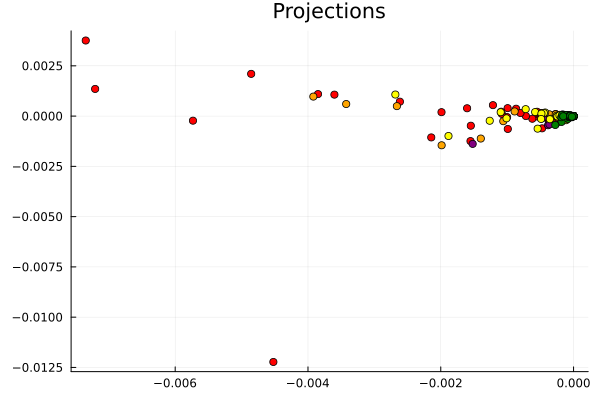

In [410]:
Jimplot = scatter(projections[1, :], projections[2, :], color=colors, title="Projections", legend=false)

In [397]:
using NearestNeighbors

NewX = projections
kdtree = KDTree(NewX)

;

In [412]:
Actual = []
Result = []
Compare = []
for i in 1:length(powersTest)
    Jim1projection = eigvecs_sorted_inds_top2' * powersTest[i]
    
    k = 25
    idxs, dists = knn(kdtree, Jim1projection, k, true)
    
    act = emotionsTest[i]
    res = mode(emotions[idxs])
    
    push!(Actual, act)
    push!(Result, res)
    
    if act == res
        push!(Compare, 1)
    else
        push!(Compare, 0)
    end
        
end

In [413]:
sum(Compare) / length(Compare)

0.373134328358209

In [414]:
AngerCompare =[]
AngerResults = []
HappyCompare = []
HappyResults = []
NeutralCOmpare =[]
NeutralResults = []
SadCompare =[]
SadResults = []
DisgustCompare =[]
DisgustResults = []
FearCompare=[]
FearResults = []

for i in 1:length(Actual)
    if Actual[i] == "Anger"
        push!(AngerResults, Result[i])
        if Result[i] == "Anger"
            push!(AngerCompare, 1)
        else
            push!(AngerCompare, 0)
        end
        
    elseif Actual[i] == "Happy"
        push!(HappyResults, Result[i])
        if Result[i] == "Happy"
            push!(HappyCompare, 1)
        else
            push!(HappyCompare, 0)
        end
        
    elseif Actual[i] == "Neutral"
        push!(NeutralResults, Result[i])
        if Result[i] == "Neutral"
            push!(NeutralCOmpare, 1)
        else
            push!(NeutralCOmpare, 0)
        end
        
    elseif Actual[i] == "Sad"
        push!(SadResults, Result[i])
        if Result[i] == "Sad"
            push!(SadCompare, 1)
        else
            push!(SadCompare, 0)
        end
        
    elseif Actual[i] == "Disgust"
        push!(DisgustResults, Result[i])
        if Result[i] == "Disgust"
            push!(DisgustCompare, 1)
        else
            push!(DisgustCompare, 0)
        end
        
    elseif Actual[i] == "Fear"
        push!(FearResults, Result[i])
        if Result[i] == "Fear"
            push!(FearCompare, 1)
        else
            push!(FearCompare, 0)
        end
 
    end
    
end     

In [415]:
sum(SadCompare) / length(SadCompare)

0.4897959183673469

In [416]:
sum(AngerCompare) / length(AngerCompare)

0.6865671641791045

In [417]:
sum(HappyCompare) / length(HappyCompare)

0.23728813559322035

In [418]:
sum(NeutralCOmpare) / length(NeutralCOmpare)

0.6

In [419]:
sum(DisgustCompare) / length(DisgustCompare)

0.08163265306122448

In [420]:
sum(FearCompare) / length(FearCompare)

0.0196078431372549

In [421]:
using StatsBase

SadResultsMap = countmap(SadResults)

Dict{Any, Int64} with 5 entries:
  "Sad"     => 24
  "Neutral" => 13
  "Happy"   => 2
  "Disgust" => 8
  "Fear"    => 2

In [422]:
AngerResultsMap = countmap(AngerResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 46
  "Sad"     => 2
  "Neutral" => 11
  "Happy"   => 5
  "Disgust" => 2
  "Fear"    => 1

In [423]:
HappyResultsMap = countmap(HappyResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 9
  "Sad"     => 9
  "Neutral" => 25
  "Happy"   => 14
  "Disgust" => 1
  "Fear"    => 1

In [424]:
NeutralResultsMap = countmap(NeutralResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 1
  "Sad"     => 13
  "Neutral" => 36
  "Happy"   => 5
  "Disgust" => 3
  "Fear"    => 2

In [425]:
DisgustResultsMap = countmap(DisgustResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 7
  "Sad"     => 12
  "Neutral" => 15
  "Happy"   => 7
  "Disgust" => 4
  "Fear"    => 4

In [332]:
FearResultsMap = countmap(FearResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 12
  "Sad"     => 14
  "Neutral" => 9
  "Happy"   => 7
  "Disgust" => 8
  "Fear"    => 1

# Splitting by Gender? (This was not used, poorer results)

In [228]:
using CSV
using DataFrames

df = CSV.read("/Users/nathangonzalez/Downloads/CREMA-D-master/VideoDemographics.csv", DataFrame)

select!(df, Not([:Age, :Race, :Ethnicity]))


firsts = []
for filename in SetUpFiles
    first4 = first(filename, 4)
    push!(firsts, parse(Int, first4))
    
end

df1 = DataFrame(col1 = firsts, col2 = SetUpFiles )
rename!(df1,[:ActorID,:File])

sexdf = innerjoin(df, df1, on = :ActorID)

;

In [229]:
sexes = sexdf[!, :Sex]

;

In [230]:
malefiles = []
femalefiles = []

for i in 1:length(SetUpFiles)
    
    if sexes[i] == "Male"
        push!(malefiles, SetUpFiles[i])
    else
        push!(femalefiles, SetUpFiles[i])
    end 
end

# Create Emotion Sets for Males

In [231]:
ang = []
dis = []
fea = []
hap = []
neu = []
sad = []

for filename in malefiles
    if occursin("ANG", filename) == true
        push!(ang, filename)
    elseif occursin("DIS", filename) == true
        push!(dis, filename)
    elseif occursin("FEA", filename) == true
        push!(fea, filename)
    elseif occursin("HAP", filename) == true
        push!(hap, filename)
    elseif occursin("NEU", filename) == true
        push!(neu, filename)
    elseif occursin("SAD", filename) == true
        push!(sad, filename)
    else
        continue
    end
end

# Create Emotion Sets for Females

In [251]:
ang = []
dis = []
fea = []
hap = []
neu = []
sad = []

for filename in femalefiles
    if occursin("ANG", filename) == true
        push!(ang, filename)
    elseif occursin("DIS", filename) == true
        push!(dis, filename)
    elseif occursin("FEA", filename) == true
        push!(fea, filename)
    elseif occursin("HAP", filename) == true
        push!(hap, filename)
    elseif occursin("NEU", filename) == true
        push!(neu, filename)
    elseif occursin("SAD", filename) == true
        push!(sad, filename)
    else
        continue
    end
end

# KPCA

In [476]:
#Get the cosine distance kernel matrix

using Distances
cosine_dists = pairwise(CosineDist(), Train_mat, dims =2)

#Center the kernel matrix

cosine_mat = cosine_dists .- mean( cosine_dists )

#Calculate Eigenvectors

eigvecs_cosine = eigvecs(cosine_mat)

#Calculate eigenvalues

eigvals_cosine = eigvals( cosine_mat )

vals = sort(eigvals_cosine,rev=true)[1:2]
inds = map( v -> findall( eigvals_cosine .== v )[1] , vals)

#Phi Vectors

phi_vecs_cosine = cosine_mat[ : , inds ]

#Calculate the projections using the higher dimensional cosine distance array

CosineProjections = phi_vecs_cosine' * cosine_dists

Test_mat = reduce(hcat,powersTest)

points_higherDim_cosine = pairwise(CosineDist(), Train_mat, Test_mat, dims =2)

;

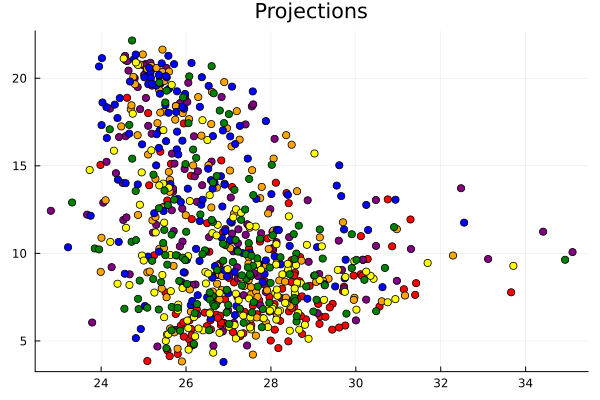

In [631]:
Jimplot = scatter(CosineProjections[1, :], CosineProjections[2, :], color=colors, title="Projections", legend=false)

display("image/png", Jimplot)

In [450]:
#Create the kNN tree

using NearestNeighbors

CosineX = CosineProjections

CosineTree = KDTree(CosineX)

;

In [568]:
Actual = []
Result = []
Compare = []
for i in 1:length(powersTest)
    
    Jim1projection = phi_vecs_cosine' * points_higherDim_cosine[:, i]
    
    k = 25
    idxs, dists = knn(CosineTree, Jim1projection, k, true)
    
    act = emotionsTest[i]
    res = mode(emotions[idxs])
    
    push!(Actual, act)
    push!(Result, res)
    
    if act == res
        push!(Compare, 1)
    else
        push!(Compare, 0)
    end
        
end

In [569]:
sum(Compare) / length(Compare)

0.23582089552238805

In [570]:
#Get the cheby distance kernel matrix

using Distances
sa_dists = pairwise(Chebyshev(), Train_mat, dims =2)

#Center the kernel matrix

sa_mat = sa_dists .- mean( sa_dists )

#Calculate Eigenvectors

eigvecs_sa = eigvecs(sa_mat)

#Calculate eigenvalues

eigvals_sa = eigvals( sa_mat )

vals = sort(eigvals_sa,rev=true)[1:2]
inds = map( v -> findall( eigvals_sa .== v )[1] , vals)

#Phi Vectors

phi_vecs_sa = sa_mat[ : , inds ]

#Calculate the projections using the higher dimensional cheby distance array

SAProjections = phi_vecs_sa' * sa_dists

Test_mat = reduce(hcat,powersTest)

points_higherDim_sa = pairwise(Chebyshev(), Train_mat, Test_mat, dims =2)

;

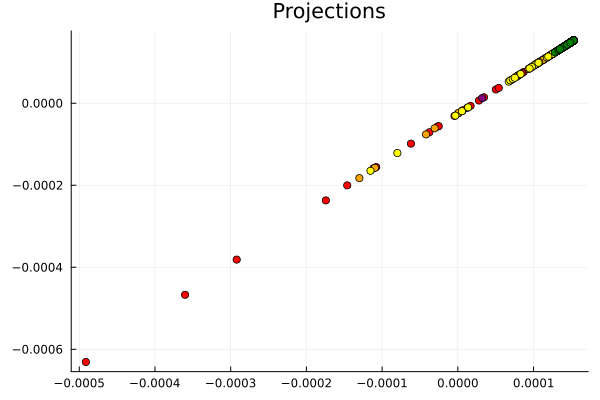

In [571]:
Jimplot = scatter(SAProjections[1, :], SAProjections[2, :], color=colors, title="Projections", legend=false)

In [572]:
#Create the kNN tree

using NearestNeighbors

saX = SAProjections

SATree = KDTree(saX)

;

In [576]:
Actual = []
Result = []
Compare = []

for i in 1:length(powersTest)
    
    Jim1projection = phi_vecs_sa' * points_higherDim_sa[:, i]
    
    k = 25
    idxs, dists = knn(SATree, Jim1projection, k, true)
    
    act = emotionsTest[i]
    res = mode(emotions[idxs])
    
    push!(Actual, act)
    push!(Result, res)
    
    if act == res
        push!(Compare, 1)
    else
        push!(Compare, 0)
    end
        
end

In [577]:
sum(Compare) / length(Compare)

0.3194029850746269

In [578]:
using Distances
jaccard_dists = pairwise(Jaccard(), Train_mat, dims =2)

jaccard_mat = jaccard_dists .- mean( jaccard_dists )

eigvecs_jaccard = eigvecs(jaccard_mat)

eigvals_jaccard = eigvals( jaccard_mat )

vals = sort(eigvals_jaccard,rev=true)[1:2]
inds = map( v -> findall( eigvals_jaccard .== v )[1] , vals)

phi_vecs_jaccard = jaccard_mat[ : , inds ]

JaccardProjections = phi_vecs_jaccard' * jaccard_dists

Test_mat = reduce(hcat,powersTest)

points_higherDim_jaccard = pairwise(Jaccard(), Train_mat, Test_mat, dims =2)

;

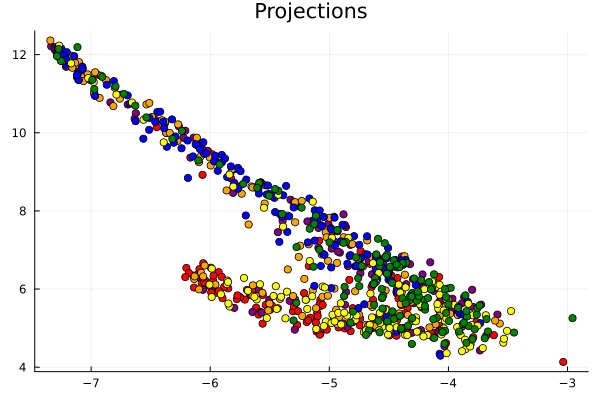

In [579]:
Jimplot = scatter(JaccardProjections[1, :], JaccardProjections[2, :], color=colors, title="Projections", legend=false)

In [580]:
#Create the kNN tree

using NearestNeighbors

JaccardX = JaccardProjections

JaccardTree = KDTree(JaccardX)

;

In [608]:
Actual = []
Result = []
Compare = []

for i in 1:length(powersTest)
    
    Jim1projection = phi_vecs_jaccard' * points_higherDim_jaccard[:, i]
    
    k = 25
    idxs, dists = knn(JaccardTree, Jim1projection, k, true)
    
    act = emotionsTest[i]
    res = mode(emotions[idxs])
    
    push!(Actual, act)
    push!(Result, res)
    
    if act == res
        push!(Compare, 1)
    else
        push!(Compare, 0)
    end
        
end

In [609]:
sum(Compare) / length(Compare)

0.39104477611940297

In [610]:
AngerCompare =[]
AngerResults = []
HappyCompare = []
HappyResults = []
NeutralCOmpare =[]
NeutralResults = []
SadCompare =[]
SadResults = []
DisgustCompare =[]
DisgustResults = []
FearCompare=[]
FearResults = []

for i in 1:length(Actual)
    if Actual[i] == "Anger"
        push!(AngerResults, Result[i])
        if Result[i] == "Anger"
            push!(AngerCompare, 1)
        else
            push!(AngerCompare, 0)
        end
        
    elseif Actual[i] == "Happy"
        push!(HappyResults, Result[i])
        if Result[i] == "Happy"
            push!(HappyCompare, 1)
        else
            push!(HappyCompare, 0)
        end
        
    elseif Actual[i] == "Neutral"
        push!(NeutralResults, Result[i])
        if Result[i] == "Neutral"
            push!(NeutralCOmpare, 1)
        else
            push!(NeutralCOmpare, 0)
        end
        
    elseif Actual[i] == "Sad"
        push!(SadResults, Result[i])
        if Result[i] == "Sad"
            push!(SadCompare, 1)
        else
            push!(SadCompare, 0)
        end
        
    elseif Actual[i] == "Disgust"
        push!(DisgustResults, Result[i])
        if Result[i] == "Disgust"
            push!(DisgustCompare, 1)
        else
            push!(DisgustCompare, 0)
        end
        
    elseif Actual[i] == "Fear"
        push!(FearResults, Result[i])
        if Result[i] == "Fear"
            push!(FearCompare, 1)
        else
            push!(FearCompare, 0)
        end
 
    end
    
end     

In [611]:
sum(SadCompare) / length(SadCompare)

0.5714285714285714

In [612]:
sum(AngerCompare) / length(AngerCompare)

0.6567164179104478

In [613]:
sum(HappyCompare) / length(HappyCompare)

0.288135593220339

In [614]:
sum(NeutralCOmpare) / length(NeutralCOmpare)

0.5333333333333333

In [615]:
sum(DisgustCompare) / length(DisgustCompare)

0.061224489795918366

In [616]:
sum(FearCompare) / length(FearCompare)

0.13725490196078433

In [617]:
using StatsBase

SadResultsMap = countmap(SadResults)

Dict{Any, Int64} with 4 entries:
  "Sad"     => 28
  "Neutral" => 13
  "Disgust" => 5
  "Fear"    => 3

In [618]:
AngerResultsMap = countmap(AngerResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 44
  "Sad"     => 1
  "Neutral" => 11
  "Happy"   => 9
  "Disgust" => 1
  "Fear"    => 1

In [619]:
HappyResultsMap = countmap(HappyResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 5
  "Sad"     => 9
  "Neutral" => 26
  "Happy"   => 17
  "Disgust" => 1
  "Fear"    => 1

In [620]:
NeutralResultsMap = countmap(NeutralResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 1
  "Sad"     => 13
  "Neutral" => 32
  "Happy"   => 3
  "Disgust" => 9
  "Fear"    => 2

In [621]:
DisgustResultsMap = countmap(DisgustResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 6
  "Sad"     => 17
  "Neutral" => 14
  "Happy"   => 6
  "Disgust" => 3
  "Fear"    => 3

In [622]:
FearResultsMap = countmap(FearResults)

Dict{Any, Int64} with 6 entries:
  "Anger"   => 9
  "Sad"     => 18
  "Neutral" => 7
  "Happy"   => 6
  "Disgust" => 4
  "Fear"    => 7